In [ ]:
!pip install statsmodels
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip3 install -U scikit-learn

In [ ]:
!pip3 install keras

In [ ]:
!pip install tensorflow

In [1]:
import pandas as pd
# load and clean-up data
from numpy import nan
from numpy import isnan
# from pandas import read_csv
from pandas import to_numeric
import numpy as np
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, RepeatVector, TimeDistributed
from matplotlib import pyplot

In [2]:
power = pd.read_csv(r'C:/Users/Pooja/Documents/Final_PwrData.csv')

In [3]:
power['System Time'] = pd.to_datetime(power['System Time'], format='%H:%M:%S:%f', errors='coerce')

In [4]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140971 entries, 0 to 140970
Data columns (total 30 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   System Time                            140971 non-null  datetime64[ns]
 1   RDTSC                                  140971 non-null  float64       
 2   Elapsed Time (sec)                     140971 non-null  float64       
 3   CPU Utilization(%)                     140971 non-null  int64         
 4   CPU Frequency_0(MHz)                   140971 non-null  int64         
 5   Processor Power_0(Watt)                140971 non-null  float64       
 6   Processor Energy_0(Joules)             140971 non-null  float64       
 7   Cumulative Processor Energy_0(Joules)  140971 non-null  float64       
 8   Cumulative Processor Energy_0(mWh)     140971 non-null  float64       
 9   IA Power_0(Watt)                       140971 no

In [16]:
dataset = pd.read_csv(r'C:/Users/Pooja/Documents/Final_PwrData.csv')
dataset['System Time'] = pd.to_datetime(dataset['System Time'], format='%H:%M:%S:%f', errors='coerce')
powerind = dataset.set_index('System Time',inplace=False)

In [17]:
powerind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140971 entries, 1900-01-01 12:15:43.977000 to 1900-01-01 16:35:11.812000
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   RDTSC                                  140971 non-null  float64
 1   Elapsed Time (sec)                     140971 non-null  float64
 2   CPU Utilization(%)                     140971 non-null  int64  
 3   CPU Frequency_0(MHz)                   140971 non-null  int64  
 4   Processor Power_0(Watt)                140971 non-null  float64
 5   Processor Energy_0(Joules)             140971 non-null  float64
 6   Cumulative Processor Energy_0(Joules)  140971 non-null  float64
 7   Cumulative Processor Energy_0(mWh)     140971 non-null  float64
 8   IA Power_0(Watt)                       140971 non-null  float64
 9   IA Energy_0(Joules)                    140971 non-null  float64
 10  Cumulati

In [18]:
powerind.head(5)

,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),Processor Power_0(Watt),Processor Energy_0(Joules),Cumulative Processor Energy_0(Joules),Cumulative Processor Energy_0(mWh),IA Power_0(Watt),IA Energy_0(Joules),...,Cumulative GT Energy_0(mWh),Package PL1_0(Watt),Package PL2_0(Watt),Package PL4_0(Watt),Platform PsysPL1_0(Watt),Platform PsysPL2_0(Watt),GT Frequency(MHz),GT Utilization(%),Power_Consumption_KJ,IA&Processor_Energy_0(Joules)
System Time,,,,,,,,,,,,,,,,,,,,,
1900-01-01 12:15:43.977,3.680000e+14,0.106,2,1200,1.884,0.200,0.200,0.056,0.450,0.048,...,0.002,18,51,93,0,0,2,77.243,0.000248,0.248
1900-01-01 12:15:44.085,3.680000e+14,0.214,4,1300,1.814,0.195,0.395,0.110,0.272,0.029,...,0.003,18,51,93,0,0,6,79.231,0.000472,0.224
1900-01-01 12:15:44.192,3.680000e+14,0.322,9,1300,2.905,0.314,0.709,0.197,1.229,0.133,...,0.005,18,51,93,0,0,7,88.103,0.000919,0.447
1900-01-01 12:15:44.303,3.680000e+14,0.432,7,1300,1.916,0.211,0.920,0.255,0.380,0.041,...,0.007,18,51,93,0,0,16,91.312,0.001171,0.252
1900-01-01 12:15:44.404,3.680000e+14,0.533,5,1300,1.808,0.183,1.103,0.306,0.323,0.033,...,0.010,18,51,93,0,0,13,82.287,0.001387,0.216


In [20]:
#dataset = pd.read_csv(r'C:/Users/Pooja/Documents/Final_PwrData.csv', header=0, infer_datetime_format=True, parse_dates=['System Time'], index_col=['System Time'])
# resample data to daily
min_groups = powerind.resample('T')
min_data = min_groups.sum()
# # summarize
print(min_data.shape)
print(min_data.head())
# # save
min_data.to_csv('Power_consumption_by_minutes.csv')


# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into 80% train and 20% test
    train, test = data[1:226], data[227:262]
    # restructure 
    train = array(split(train, len(train)/1))
    test = array(split(test, len(test)/1))
    return train, test


train, test = split_dataset(powerind.values)
# validate train data
print(train.shape)

# validate test
print(test.shape)


(261, 29)
                            RDTSC  Elapsed Time (sec)  CPU Utilization(%)  \
System Time                                                                 
1900-01-01 12:15:00  5.413200e+16            1190.690                1620   
1900-01-01 12:16:00  2.022120e+17           25276.617                9504   
1900-01-01 12:17:00  1.999980e+17           57624.272                2879   
1900-01-01 12:18:00  2.022120e+17           91049.874                1671   
1900-01-01 12:19:00  2.022120e+17          123926.639                3360   

                     CPU Frequency_0(MHz)  Processor Power_0(Watt)  \
System Time                                                          
1900-01-01 12:15:00                302200                  702.702   
1900-01-01 12:16:00               1307600                 3879.854   
1900-01-01 12:17:00               1011000                 1534.269   
1900-01-01 12:18:00                938200                  990.885   
1900-01-01 12:19:00           

In [22]:
print(train.shape)
print(type(train))

(225, 1, 29)
<class 'numpy.ndarray'>


In [23]:
# multivariate multi-step encoder-decoder lstm
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	print("^^^fun evaluate_forecast")
	print("actual::::", actual)
	print("predicted",predicted)
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	print("______summarize_scores func")
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	print("******to_supervised func")
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	print("****func - build_model")
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 2, 8
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	print("-----train_x.shape[1]",train_x.shape[1])
	print("____train_x.shape[2]",train_x.shape[2])
	print("-------train_y.shape[1]", train_y.shape[1])
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	print("*******forecast func")
	# flatten data
	data = array(history)
	print("data=",data)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	print("data reshaped ---", data)
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	print("input_x ====", input_x)
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	print("input_x reshaped!!!",input_x)
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	print("model predicted yhat_____",yhat)
	# we only want the vector forecast
	yhat = yhat[0]
	print("yhat value calculated!!!!!!", yhat)
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	print("****evaluate_model func")
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	print("____predictions___", predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	print("score ------", score)
	print("*******scores",scores)
	return score, scores, predictions



In [ ]:
# train the model
def build_model(train, n_input):
	print("****func - build_model")
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 2, 8
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	print("-----train_x.shape[1]",train_x.shape[1])
	print("____train_x.shape[2]",train_x.shape[2])
	print("-------train_y.shape[1]", train_y.shape[1])
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [24]:

nan_indices = np.isnan(train)
print("Number of NaN values:", np.sum(nan_indices))


Number of NaN values: 0


In [25]:


# Normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(powerind)

# Split the dataset into train and test
train, test = split_dataset(dataset)

# evaluate model and get scores
n_input = 5
score, scores, predictions = evaluate_model(train, test, n_input)

# Summarize the scores
summarize_scores('LSTM', score, scores)



****evaluate_model func
****func - build_model
******to_supervised func
-----train_x.shape[1] 5
____train_x.shape[2] 29
-------train_y.shape[1] 7
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.56726995e-03 1.56075808e-02 ... 5.87248943e-01
   7.26324848e-03 4.38630242e-02]]

 [[2.27272727e-02 1.57427157e-03 1.56075808e-02 ... 5.93068416e-01
   7.30202154e-03 6.89688342e-02]]

 [[2.27272727e-02 1.58197977e-03 1.44927536e-02 ... 6.06297853e-01
   7.33822562e-03 6.43035783e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.93249027e-06 9.33051174e-03]
 [0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
  1.77709865e-05 2.0

model predicted yhat_____ [[[0.01484369]
  [0.01759794]
  [0.0193792 ]
  [0.02050341]
  [0.02115023]
  [0.02158211]
  [0.02187352]]]
yhat value calculated!!!!!! [[0.01484369]
 [0.01759794]
 [0.0193792 ]
 [0.02050341]
 [0.02115023]
 [0.02158211]
 [0.02187352]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.59585453e-03 1.67224080e-02 ... 7.23118843e-01
   7.38830750e-03 5.97345133e-02]]

 [[2.27272727e-02 1.60285615e-03 1.78372352e-02 ... 5.22408670e-01
   7.41476534e-03 4.66044633e-02]]

 [[2.27272727e-02 1.60966506e-03 1.78372352e-02 ... 6.46688942e-01
   7.44834748e-03 5.95421316e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01502939]
  [0.01747228]
  [0.0187834 ]
  [0.01955566]
  [0.01995873]
  [0.02017747]
  [0.02028708]]]
yhat value calculated!!!!!! [[0.01502939]
 [0.01747228]
 [0.0187834 ]
 [0.01955566]
 [0.01995873]
 [0.02017747]
 [0.02028708]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.60966506e-03 1.78372352e-02 ... 6.46688942e-01
   7.44834748e-03 5.95421316e-02]]

 [[2.27272727e-02 1.61673091e-03 3.12151616e-02 ... 5.89295622e-01
   7.52944250e-03 1.45825317e-01]]

 [[2.27272727e-02 1.62366829e-03 2.45261984e-02 ... 6.34038986e-01
   7.57878281e-03 8.81589073e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01561015]
  [0.0184481 ]
  [0.02007654]
  [0.02103352]
  [0.02162477]
  [0.02199987]
  [0.02222381]]]
yhat value calculated!!!!!! [[0.01561015]
 [0.0184481 ]
 [0.02007654]
 [0.02103352]
 [0.02162477]
 [0.02199987]
 [0.02222381]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.62366829e-03 2.45261984e-02 ... 6.34038986e-01
   7.57878281e-03 8.81589073e-02]]

 [[2.27272727e-02 1.63060567e-03 2.34113712e-02 ... 6.19440985e-01
   7.62709023e-03 8.62831858e-02]]

 [[2.27272727e-02 1.63747881e-03 1.44927536e-02 ... 6.49869925e-01
   7.65119097e-03 4.23239708e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01538483]
  [0.01851184]
  [0.02054689]
  [0.02174939]
  [0.02252259]
  [0.02303442]
  [0.02338497]]]
yhat value calculated!!!!!! [[0.01538483]
 [0.01851184]
 [0.02054689]
 [0.02174939]
 [0.02252259]
 [0.02303442]
 [0.02338497]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.64441620e-03 1.44927536e-02 ... 6.15532568e-01
   7.68109178e-03 5.28568680e-02]]

 [[2.27272727e-02 1.65231710e-03 1.56075808e-02 ... 6.13276289e-01
   7.70529846e-03 4.25163524e-02]]

 [[2.27272727e-02 1.65925448e-03 1.67224080e-02 ... 7.20196777e-01
   7.73983403e-03 6.12735668e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01488237]
  [0.01763888]
  [0.01941438]
  [0.02050496]
  [0.02115296]
  [0.02158488]
  [0.02187759]]]
yhat value calculated!!!!!! [[0.01488237]
 [0.01763888]
 [0.01941438]
 [0.02050496]
 [0.02115296]
 [0.02158488]
 [0.02187759]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.65925448e-03 1.67224080e-02 ... 7.20196777e-01
   7.73983403e-03 6.12735668e-02]]

 [[2.27272727e-02 1.66619186e-03 1.56075808e-02 ... 6.36307594e-01
   7.76615945e-03 4.63639861e-02]]

 [[2.27272727e-02 1.67312924e-03 1.33779264e-02 ... 8.92721960e-01
   7.78581083e-03 3.42439400e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01458582]
  [0.01695838]
  [0.01850558]
  [0.01940812]
  [0.02000935]
  [0.02039668]
  [0.02065373]]]
yhat value calculated!!!!!! [[0.01458582]
 [0.01695838]
 [0.01850558]
 [0.01940812]
 [0.02000935]
 [0.02039668]
 [0.02065373]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.67312924e-03 1.33779264e-02 ... 8.92721960e-01
   7.78581083e-03 3.42439400e-02]]

 [[2.27272727e-02 1.68006662e-03 2.11817168e-02 ... 6.25013871e-01
   7.83795848e-03 9.32570219e-02]]

 [[2.27272727e-02 1.68700401e-03 1.44927536e-02 ... 6.09022649e-01
   7.85456415e-03 2.87129665e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.68700401e-03 1.44927536e-02 ... 6.09022649e-01
   7.85456415e-03 2.87129665e-02]]

 [[2.27272727e-02 1.69394139e-03 1.44927536e-02 ... 6.49980889e-01
   7.89540299e-03 7.27202770e-02]]

 [[2.27272727e-02 1.70087877e-03 1.44927536e-02 ... 6.18343669e-01
   7.90906891e-03 2.33743748e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.93249027e-06 9.33051174e-03]
 [0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
  1.77709865e-05 2.00557907e-02]
 [0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
  2.44450380e-05 1.06771835e-02]
 ...
 [2.27272727e-02 1.68700401e-03 1.44927536e-02 ...

model predicted yhat_____ [[[0.01338768]
  [0.01505732]
  [0.01592476]
  [0.01650707]
  [0.01691756]
  [0.01720728]
  [0.01740654]]]
yhat value calculated!!!!!! [[0.01338768]
 [0.01505732]
 [0.01592476]
 [0.01650707]
 [0.01691756]
 [0.01720728]
 [0.01740654]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.70087877e-03 1.44927536e-02 ... 6.18343669e-01
   7.90906891e-03 2.33743748e-02]]

 [[2.27272727e-02 1.70788038e-03 1.33779264e-02 ... 3.93529535e-01
   7.93584457e-03 4.71816083e-02]]

 [[2.27272727e-02 1.71481776e-03 1.56075808e-02 ... 6.31412825e-01
   7.96545405e-03 5.23278184e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01518727]
  [0.01789919]
  [0.01942339]
  [0.02048612]
  [0.02122193]
  [0.02171878]
  [0.02205289]]]
yhat value calculated!!!!!! [[0.01518727]
 [0.01789919]
 [0.01942339]
 [0.02048612]
 [0.02122193]
 [0.02171878]
 [0.02205289]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.71481776e-03 1.56075808e-02 ... 6.31412825e-01
   7.96545405e-03 5.23278184e-02]]

 [[2.27272727e-02 1.72175514e-03 1.89520624e-02 ... 8.77199255e-01
   7.99453385e-03 5.13659100e-02]]

 [[2.27272727e-02 1.72869253e-03 1.67224080e-02 ... 5.65758812e-01
   8.02607668e-03 5.58387841e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01566979]
  [0.01898498]
  [0.02092074]
  [0.0222198 ]
  [0.02313265]
  [0.02374122]
  [0.02416189]]]
yhat value calculated!!!!!! [[0.01566979]
 [0.01898498]
 [0.02092074]
 [0.0222198 ]
 [0.02313265]
 [0.02374122]
 [0.02416189]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.72869253e-03 1.67224080e-02 ... 5.65758812e-01
   8.02607668e-03 5.58387841e-02]]

 [[2.27272727e-02 1.73569414e-03 1.22630992e-02 ... 6.36726793e-01
   8.06172460e-03 6.32935745e-02]]

 [[2.27272727e-02 1.74359505e-03 1.44927536e-02 ... 6.32892352e-01
   8.08058144e-03 3.28010773e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

   8.14099220e-03 6.70931127e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.93249027e-06 9.33051174e-03]
 [0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
  1.77709865e-05 2.00557907e-02]
 [0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
  2.44450380e-05 1.06771835e-02]
 ...
 [2.27272727e-02 1.74359505e-03 1.44927536e-02 ... 6.32892352e-01
  8.08058144e-03 3.28010773e-02]
 [2.27272727e-02 1.75053243e-03 1.89520624e-02 ... 6.39439259e-01
  8.10325203e-03 3.97268180e-02]
 [2.27272727e-02 1.75746981e-03 1.44927536e-02 ... 6.21315053e-01
  8.14099220e-03 6.70931127e-02]]
input_x ==== [[0.02272727 0.00172869 0.01672241 0.33333333 0.18143282 0.06208731
  0.00623326 0.00623315 0.14720812 0.05000505 0.01321912 0.01321924
  0.30434783 0.         0.         0.         0.         0.
  0.0069537  0.006956   0.         0.         0.         0.
  0.         0.01502504 0.56575881 0.00802608 0.05583878]
 [0.02272727 0.0017

model predicted yhat_____ [[[0.01499453]
  [0.01783071]
  [0.01962737]
  [0.02069652]
  [0.02134742]
  [0.02176067]
  [0.0220254 ]]]
yhat value calculated!!!!!! [[0.01499453]
 [0.01783071]
 [0.01962737]
 [0.02069652]
 [0.02134742]
 [0.02176067]
 [0.0220254 ]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.75746981e-03 1.44927536e-02 ... 6.21315053e-01
   8.14099220e-03 6.70931127e-02]]

 [[2.27272727e-02 1.76447142e-03 1.44927536e-02 ... 6.27590714e-01
   8.16207373e-03 3.68410927e-02]]

 [[2.27272727e-02 1.77153728e-03 1.33779264e-02 ... 6.15717509e-01
   8.19597367e-03 6.01192766e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.0130408 ]
  [0.01445503]
  [0.01520759]
  [0.01563768]
  [0.01590659]
  [0.01607641]
  [0.01618593]]]
yhat value calculated!!!!!! [[0.0130408 ]
 [0.01445503]
 [0.01520759]
 [0.01563768]
 [0.01590659]
 [0.01607641]
 [0.01618593]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.77153728e-03 1.33779264e-02 ... 6.15717509e-01
   8.19597367e-03 6.01192766e-02]]

 [[2.27272727e-02 1.77853889e-03 1.44927536e-02 ... 3.78080807e-01
   8.21411544e-03 3.15025010e-02]]

 [[2.27272727e-02 1.78541204e-03 2.11817168e-02 ... 6.10514506e-01
   8.23535587e-03 3.71296653e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01259191]
  [0.01355421]
  [0.01399011]
  [0.01428869]
  [0.01450613]
  [0.01468705]
  [0.01483459]]]
yhat value calculated!!!!!! [[0.01259191]
 [0.01355421]
 [0.01399011]
 [0.01428869]
 [0.01450613]
 [0.01468705]
 [0.01483459]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.78541204e-03 2.11817168e-02 ... 6.10514506e-01
   8.23535587e-03 3.71296653e-02]]

 [[2.27272727e-02 1.79241365e-03 1.56075808e-02 ... 8.95681014e-01
   8.25106108e-03 2.70777222e-02]]

 [[2.27272727e-02 1.79928680e-03 1.44927536e-02 ... 6.23546673e-01
   8.27614174e-03 4.41035013e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01320546]
  [0.0146234 ]
  [0.01545237]
  [0.01591862]
  [0.01621187]
  [0.01640822]
  [0.01654359]]]
yhat value calculated!!!!!! [[0.01320546]
 [0.0146234 ]
 [0.01545237]
 [0.01591862]
 [0.01621187]
 [0.01640822]
 [0.01654359]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.79928680e-03 1.44927536e-02 ... 6.23546673e-01
   8.27614174e-03 4.41035013e-02]]

 [[2.27272727e-02 1.80615994e-03 1.33779264e-02 ... 6.47478023e-01
   8.31218692e-03 6.40150058e-02]]

 [[2.27272727e-02 1.81322580e-03 1.67224080e-02 ... 6.37355592e-01
   8.33649954e-03 4.27087341e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

model predicted yhat_____ [[[0.01500313]
  [0.01784541]
  [0.01967283]
  [0.0207266 ]
  [0.02141142]
  [0.02185659]
  [0.02216015]]]
yhat value calculated!!!!!! [[0.01500313]
 [0.01784541]
 [0.01967283]
 [0.0207266 ]
 [0.02141142]
 [0.02185659]
 [0.02216015]]
*******forecast func
data= [[[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
   5.93249027e-06 9.33051174e-03]]

 [[0.00000000e+00 1.38747616e-05 1.00334448e-02 ... 8.56017360e-01
   1.77709865e-05 2.00557907e-02]]

 [[0.00000000e+00 2.09406125e-05 7.80379041e-03 ... 8.95582379e-01
   2.44450380e-05 1.06771835e-02]]

 ...

 [[2.27272727e-02 1.81322580e-03 1.67224080e-02 ... 6.37355592e-01
   8.33649954e-03 4.27087341e-02]]

 [[2.27272727e-02 1.82016318e-03 1.44927536e-02 ... 6.66859827e-01
   8.37368354e-03 6.60831089e-02]]

 [[2.27272727e-02 1.82716479e-03 1.44927536e-02 ... 6.10403541e-01
   8.39447374e-03 3.63120431e-02]]]
data reshaped --- [[0.00000000e+00 6.93738082e-06 4.45930881e-03 ... 7.46630994e-01
  5.9

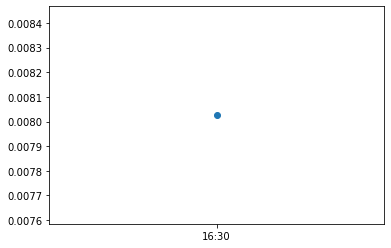

In [26]:
time = ["16:30"]
pyplot.plot(time, scores, marker='o', label='lstm')
pyplot.show()